# 时间序列分析

### 回归中使用趋势变量

例10.7 住房投资与价格

In [2]:
import ipystata

In [55]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/hseinv, clear

In [56]:
%%stata

su
return list

tsset t


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        year |         42      1967.5    12.26784       1947       1988
         inv |         42    104512.4    31304.66      54864     168406
         pop |         42    197380.9    30518.64     144126     246329
       price |         42    .9126357    .0591968       .819     1.0432
        linv |         42    11.51463    .2935944   10.91261   12.03413
-------------+---------------------------------------------------------
        lpop |         42    12.18079     .159031   11.87844   12.41442
      lprice |         42   -.0934133    .0634723  -.1996712   .0422929
           t |         42        21.5    12.26784          1         42
       invpc |         42    .5213382    .0926875   .3641665   .7034482
      linvpc |         42   -.6661551    .1725434  -1.010144   -.351761
-------------+-------------------------------------------------

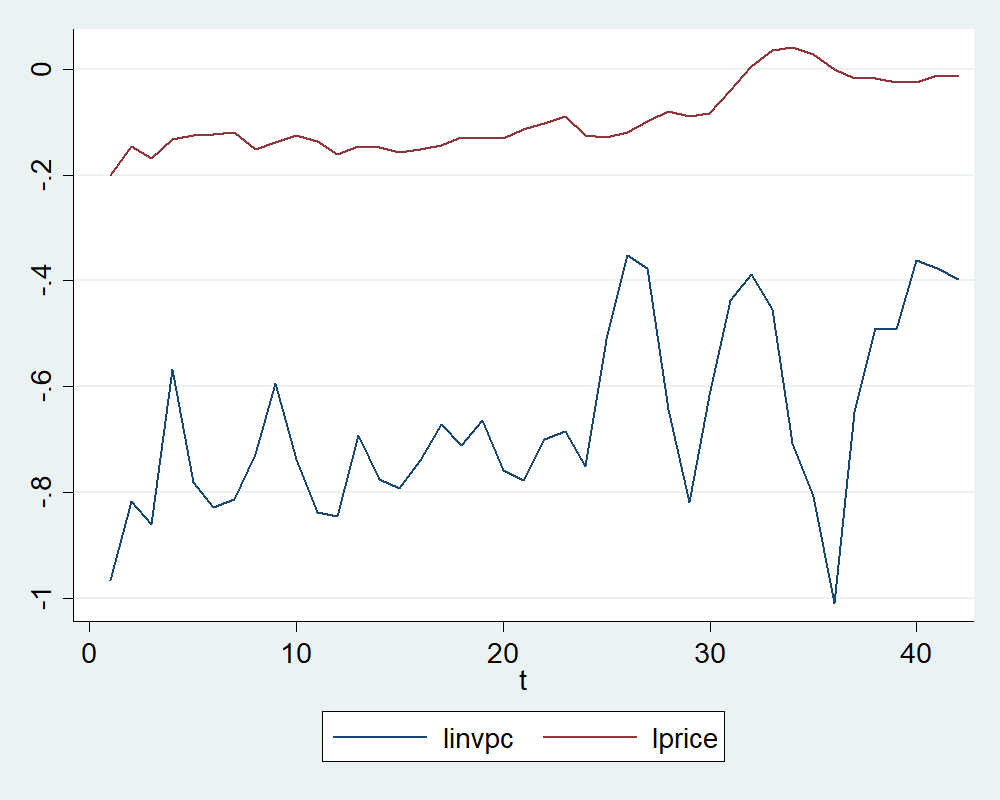

In [57]:
%%stata

tsline linvpc lprice

In [22]:
%%stata

eststo: quietly reg linvpc lprice
eststo: quietly reg linvpc t
eststo: quietly reg lprice t
eststo: quietly reg linvpc lprice t
esttab, ar2

(est1 stored)

(est2 stored)

(est3 stored)

(est4 stored)

----------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)   
                   linvpc          linvpc          lprice          linvpc   
----------------------------------------------------------------------------
lprice              1.241**                                        -0.381   
                   (3.24)                                         (-0.56)   

t                                 0.00815***      0.00442***      0.00983** 
                                   (4.49)         (10.37)          (2.80)   

_cons              -0.550***       -0.841***       -0.188***       -0.913***
                 (-12.79)        (-18.80)        (-17.92)         (-6.73)   
----------------------------------------------------------------------------
N                      42              42              42              42   
adj. R-sq     

### 序列相关的检验

- 回归元为严格外生时对AR(1)序列相关的t检验

例12.1 菲利普斯曲线中AR(1)序列相关的检验

In [29]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/phillips, clear
tsset year, yearly
reg inf unem


        time variable:  year, 1948 to 1996
                delta:  1 year

      Source |       SS           df       MS      Number of obs   =        49
-------------+----------------------------------   F(1, 47)        =      2.62
       Model |  25.6369575         1  25.6369575   Prob > F        =    0.1125
    Residual |   460.61979        47  9.80042107   R-squared       =    0.0527
-------------+----------------------------------   Adj R-squared   =    0.0326
       Total |  486.256748        48  10.1303489   Root MSE        =    3.1306

------------------------------------------------------------------------------
         inf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        unem |   .4676257   .2891262     1.62   0.112    -.1140213    1.049273
       _cons |    1.42361   1.719015     0.83   0.412    -2.034602    4.881822
------------------------------------------------------

In [36]:
%%stata

return list


macros:
               r(name) : "<unnamed>"
               r(type) : "text"
             r(status) : "on"
           r(filename) : "C:\Users\plutoese\.ipython\stata\log_main.txt"



In [38]:
%%stata

ereturn list


scalars:
                  e(N) =  48
               e(df_m) =  1
               e(df_r) =  46
                  e(F) =  24.34159367995789
                 e(r2) =  .3460483677794952
               e(rmse) =  2.489972985360522
                e(mss) =  150.9170402475708
                e(rss) =  285.1984115199588
               e(r2_a) =  .3318320279486147
                 e(ll) =  -110.8766681836913
               e(ll_0) =  -121.0699934743136
               e(rank) =  2

macros:
            e(cmdline) : "regress uh L.uh"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "ols"
             e(depvar) : "uh"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"

matrices:
                  e(b) :  1 x 2
                  e(V) :  2 x 2

functions:
             e(sample)   



In [30]:
%%stata

predict uh, resid
reg uh L.uh


      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(1, 46)        =     24.34
       Model |   150.91704         1   150.91704   Prob > F        =    0.0000
    Residual |  285.198412        46  6.19996547   R-squared       =    0.3460
-------------+----------------------------------   Adj R-squared   =    0.3318
       Total |  436.115452        47  9.27905217   Root MSE        =      2.49

------------------------------------------------------------------------------
          uh |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          uh |
         L1. |   .5729695   .1161334     4.93   0.000     .3392052    .8067338
             |
       _cons |  -.1133967    .359404    -0.32   0.754    -.8368393     .610046
------------------------------------------------------------------------------



- 经典假定条件下的德宾-沃森检验

In [40]:
%%stata

estat dwatson

di r(dw)


Durbin-Watson d-statistic(  2,    48) =  1.354317

1.3543174



- 回归元不是严格外生时AR(1)序列相关的检验

例12.2 检验最低工资方程中的AR(1)序列相关

In [42]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/prminwge, clear
tsset year, yearly
reg lprepop lmincov lprgnp lusgnp t


        time variable:  year, 1950 to 1987
                delta:  1 year

      Source |       SS           df       MS      Number of obs   =        38
-------------+----------------------------------   F(4, 33)        =     66.23
       Model |  .284429802         4  .071107451   Prob > F        =    0.0000
    Residual |  .035428549        33  .001073592   R-squared       =    0.8892
-------------+----------------------------------   Adj R-squared   =    0.8758
       Total |  .319858351        37   .00864482   Root MSE        =    .03277

------------------------------------------------------------------------------
     lprepop |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lmincov |  -.2122611   .0401525    -5.29   0.000     -.293952   -.1305703
      lprgnp |   .2852399   .0804923     3.54   0.001     .1214771    .4490027
      lusgnp |   .4860416   .2219838     2.19   0.036 

In [43]:
%%stata

predict uh, res
reg uh lmincov lprgnp lusgnp t L.uh


      Source |       SS           df       MS      Number of obs   =        37
-------------+----------------------------------   F(5, 31)        =      1.98
       Model |  .007527219         5  .001505444   Prob > F        =    0.1089
    Residual |  .023530495        31  .000759048   R-squared       =    0.2424
-------------+----------------------------------   Adj R-squared   =    0.1202
       Total |  .031057714        36  .000862714   Root MSE        =    .02755

------------------------------------------------------------------------------
          uh |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lmincov |   .0375001   .0352124     1.06   0.295    -.0343161    .1093164
      lprgnp |  -.0784652   .0705241    -1.11   0.274       -.2223    .0653696
      lusgnp |   .2039314   .1951597     1.04   0.304    -.1940995    .6019622
           t |  -.0034662   .0040736    -0.85   0.

- 更高阶序列相关的检验

例12.3 AR(3)序列相关的检验

In [44]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/barium, clear
tsset t, yearly
reg lchnimp lchempi lgas lrtwex befile6 affile6 afdec6


        time variable:  t, 1 to 0131
                delta:  1 year

      Source |       SS           df       MS      Number of obs   =       131
-------------+----------------------------------   F(6, 124)       =      9.06
       Model |  19.4051456         6  3.23419093   Prob > F        =    0.0000
    Residual |  44.2471061       124  .356831501   R-squared       =    0.3049
-------------+----------------------------------   Adj R-squared   =    0.2712
       Total |  63.6522517       130  .489632706   Root MSE        =    .59735

------------------------------------------------------------------------------
     lchnimp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lchempi |     3.1172    .479202     6.50   0.000     2.168725    4.065675
        lgas |   .1963049   .9066233     0.22   0.829    -1.598157    1.990766
      lrtwex |   .9830093   .4001536     2.46   0.015     .1

In [45]:
%%stata

predict uh, res
reg uh lchempi lgas lrtwex befile6 affile6 afdec6 L(1/3).uh


      Source |       SS           df       MS      Number of obs   =       128
-------------+----------------------------------   F(9, 118)       =      1.72
       Model |  5.03366421         9  .559296023   Prob > F        =    0.0920
    Residual |  38.3937238       118  .325370541   R-squared       =    0.1159
-------------+----------------------------------   Adj R-squared   =    0.0485
       Total |   43.427388       127  .341947937   Root MSE        =    .57041

------------------------------------------------------------------------------
          uh |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lchempi |  -.1431572   .4720255    -0.30   0.762    -1.077896    .7915818
        lgas |   .6232994   .8859803     0.70   0.483    -1.131183    2.377782
      lrtwex |   .1786641   .3910344     0.46   0.649    -.5956904    .9530186
     befile6 |  -.0859232   .2510069    -0.34   0.

In [46]:
%%stata

test L1.uh L2.uh L3.uh


 ( 1)  L.uh = 0
 ( 2)  L2.uh = 0
 ( 3)  L3.uh = 0

       F(  3,   118) =    5.12
            Prob > F =    0.0023



### 有AR(1)误差的可行GLS估计

- 柯克伦-奥卡特(CO)估计
- 普莱斯-温斯顿(PW)估计

例12.4 事件研究中的普莱斯-温斯顿估计

In [49]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/barium, clear

tsset t
reg lchnimp lchempi lgas lrtwex befile6 affile6 afdec6
prais lchnimp lchempi lgas lrtwex befile6 affile6 afdec6, corc


        time variable:  t, 1 to 131
                delta:  1 unit

      Source |       SS           df       MS      Number of obs   =       131
-------------+----------------------------------   F(6, 124)       =      9.06
       Model |  19.4051456         6  3.23419093   Prob > F        =    0.0000
    Residual |  44.2471061       124  .356831501   R-squared       =    0.3049
-------------+----------------------------------   Adj R-squared   =    0.2712
       Total |  63.6522517       130  .489632706   Root MSE        =    .59735

------------------------------------------------------------------------------
     lchnimp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lchempi |     3.1172    .479202     6.50   0.000     2.168725    4.065675
        lgas |   .1963049   .9066233     0.22   0.829    -1.598157    1.990766
      lrtwex |   .9830093   .4001536     2.46   0.015     .19

### 在OLS后的序列相关-稳健推断

例12.7 波多黎各的最低工资

In [52]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/prminwge
tsset t

eststo clear
eststo: quietly reg lprepop lmincov lprgnp lusgnp t
eststo: quietly newey lprepop lmincov lprgnp lusgnp t, lag(2)
eststo: quietly prais lprepop lmincov lprgnp lusgnp t, corc
esttab


        time variable:  t, 1 to 38
                delta:  1 unit

(est1 stored)

(est2 stored)

(est3 stored)

------------------------------------------------------------
                      (1)             (2)             (3)   
                  lprepop         lprepop         lprepop   
------------------------------------------------------------
lmincov            -0.212***       -0.212***       -0.111*  
                  (-5.29)         (-4.64)         (-2.48)   

lprgnp              0.285**         0.285**         0.267*  
                   (3.54)          (2.86)          (2.39)   

lusgnp              0.486*          0.486           0.366   
                   (2.19)          (1.74)          (1.66)   

t                 -0.0267***      -0.0267***      -0.0243***
                  (-5.76)         (-4.63)         (-4.20)   

_cons              -6.663***       -6.663***       -5.519***
                  (-5.30)         (-4.34)         (-4.12)   
-----------------------------

### 单位根检验

假设AR(1)模型
$$y_{t}=\alpha + \rho y_{t-1} + e_{t} \qquad (1)$$ 

原假设是,$\{y_{t} \}$有一个单位根
$$H_{0}: \rho = 1$$
$$H_{1}: \rho < 1$$

将方程(1)的两边同时减去$y_{t-1}$，并设$\theta = \rho -1$, 得到
$$\Delta y_{t} = \alpha + \theta y_{t-1} + e_{t}$$

t统计量在$H_{0}$下的渐近分布被称为DF分布，因迪基和富勒而得名。由此得到的检验被称为单位根的DF检验。

更一般地，我们可以在方程中加进$\Delta y_{t}$的p期滞后，以表示这个动态过程。单位根检验的原假设非常相似：即将$\Delta y_{t}$对$y_{t-1},\Delta y_{t-1},...,\Delta y_{t-p}$回归，并对$y_{t-1}$的系数$\hat{\theta}$进行t检验。这个DF检验的广义形式被称为曾广迪基-富勒(ADF)检验。

例18.4 美国真实国内生产总值对数中的单位根

In [58]:
%%stata

use http://fmwww.bc.edu/ec-p/data/wooldridge/inven
tsset year

gen lgdp=log(gdp)
reg D.lgdp year L.lgdp L.D.lgdp


        time variable:  year, 1959 to 1995
                delta:  1 unit

      Source |       SS           df       MS      Number of obs   =        35
-------------+----------------------------------   F(3, 31)        =      3.78
       Model |  .004591884         3  .001530628   Prob > F        =    0.0201
    Residual |  .012541804        31  .000404574   R-squared       =    0.2680
-------------+----------------------------------   Adj R-squared   =    0.1972
       Total |  .017133688        34  .000503932   Root MSE        =    .02011

------------------------------------------------------------------------------
      D.lgdp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        year |   .0058696    .002696     2.18   0.037     .0003711    .0113681
             |
        lgdp |
         L1. |  -.2096203   .0865941    -2.42   0.022    -.3862301   -.0330104
         LD. |   .263747

In [59]:
%%stata

display "rho=" 1+_b[L.lgdp]

rho=.79037972



In [60]:
%%stata

reg D.lgdp L.lgdp L.D.lgdp


      Source |       SS           df       MS      Number of obs   =        35
-------------+----------------------------------   F(2, 32)        =      2.96
       Model |  .002674165         2  .001337083   Prob > F        =    0.0662
    Residual |  .014459523        32   .00045186   R-squared       =    0.1561
-------------+----------------------------------   Adj R-squared   =    0.1033
       Total |  .017133688        34  .000503932   Root MSE        =    .02126

------------------------------------------------------------------------------
      D.lgdp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        lgdp |
         L1. |  -.0226876   .0118894    -1.91   0.065    -.0469056    .0015304
         LD. |   .1671587    .167669     1.00   0.326    -.1743718    .5086892
             |
       _cons |   .2148862    .100468     2.14   0.040     .0102395    .4195328
--------------------

In [61]:
%%stata

display "rho=" 1+_b[L.lgdp]

rho=.9773124



In [62]:
%%stata

* ADF test
use http://www.stata-press.com/data/r14/air2, clear
su

(TIMESLAB: Airline passengers)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         air |        144    280.2986    119.9663        104        622
        time |        144    1954.958    3.476109       1949   1960.917
           t |        144        72.5    41.71331          1        144



In [67]:
%%stata

dfuller air, lags(3) regress


Augmented Dickey-Fuller test for unit root         Number of obs   =       140

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -1.536            -3.497            -2.887            -2.577
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.5158

------------------------------------------------------------------------------
       D.air |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         air |
         L1. |  -.0361367   .0235322    -1.54   0.127    -.0826763    .0104028
         LD. |   .3587784   .0855697     4.19   0.000     .1895479 

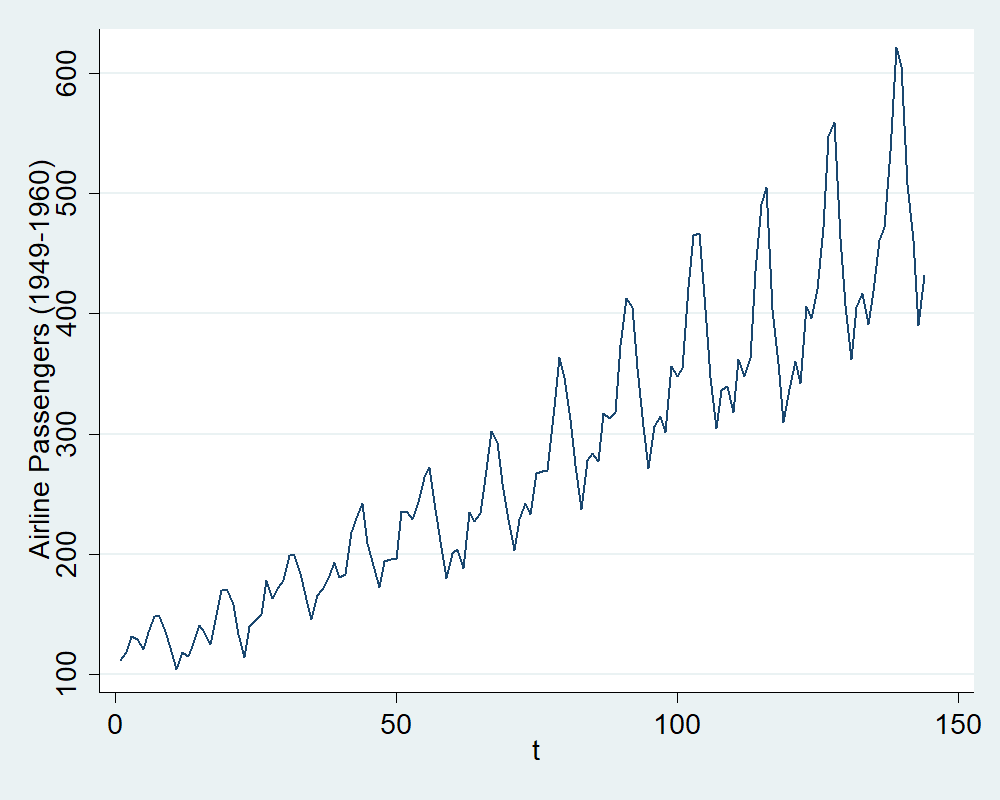

In [63]:
%%stata

tsline air

In [64]:
%%stata

dfuller air, lags(3) trend regress


Augmented Dickey-Fuller test for unit root         Number of obs   =       140

                               ---------- Interpolated Dickey-Fuller ---------
                  Test         1% Critical       5% Critical      10% Critical
               Statistic           Value             Value             Value
------------------------------------------------------------------------------
 Z(t)             -6.936            -4.027            -3.445            -3.145
------------------------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.0000

------------------------------------------------------------------------------
D.air        |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         air |
         L1. |  -.5217089   .0752195    -6.94   0.000      -.67048   -.3729379
         LD. |   .5572871   .0799894     6.97   0.000      .399082 

### 谬误回归

令$\{x_{t}\}$和$\{y_{t}\}$是由如下方程产生的随机游走
$$x_{t}=x_{t-1}+\alpha_{t}$$
$$y_{t}=y_{t-1}+e_{t}$$
如果我们做如下回归
$$\hat{y}_{t}=\hat{\beta}_{0}+\hat{\beta}_{1}x_{t}$$
通过模拟，格兰杰和纽博尔德（$1974$）发现，即使$y_{t}$和$x_{t}$相互独立，但在$y_{t}$对$x_{t}$的多次回归中，有很大比例的次数都会得到一个统计显著的$t$统计量，而且远大于名义显著性水平。格兰杰和纽博尔德把这种现象称为谬误回归问题：$y$和$x$之间根本没有关系，但使用$t$统计量的OLS回归往往标示着它们之间存在某种关系。

**在把I(1)变量用于线性回归模型之前，无论是用OLS还是用工具变量法估计它们，都应该先进行差分，这是个稳妥的方法。而且在格兰杰-纽博尔德关于伪回归的经典论文发表之后，许多时间序列回归都采用这种方法。**

### 协整和误差修正模型

如果${y_{t}:t=0,1,...}$和${x_{t}:t=0,1,...}$是两个I(1)过程，如果对某些$\beta \neq 0$值来说，$y_{t}-\beta x_{t}$ 有可能是一个I(0)过程。若存在这样的$\beta$，我们就说y和x是协整的，并称$\beta$为协整参数。

- 误差修正模型
$$\Delta y_{t} = \alpha_{0} + \alpha_{1}\Delta y_{t-1} + \gamma_{0}\Delta x_{t} + \gamma_{1}\Delta x_{t-1} + \delta(y_{t-1} - \beta x_{t-1}) + \mu_{t}$$